## **Problem Statement:**

The problem involves classifying consumer complaints related to financial products into specific categories. The dataset contains complaints on various financial products, such as credit reporting, loans, credit cards, and more. The objective is to develop a classification model that can accurately categorize these complaints, enabling banking and financial institutions to efficiently address customer issues and provide tailored solutions based on the type of complaint.

**Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# from textblob import TextBlob
# from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from io import StringIO
import os
import string
import gensim
from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stopword_list = nltk.corpus.stopwords.words('english')
tokenizer = ToktokTokenizer()
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/sample_data.csv")
df.head(10)

,complaint_id,date_received,product,issue,company,state,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,consumer_complaint_narrative
0,7045386,2023-05-31,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,Experian Information Solutions Inc.,VA,Web,Closed with explanation,Yes,NaN,I looked over my credit report and saw some in...
1,7258681,2023-07-17,Credit card or prepaid card,Closing your account,SYNCHRONY FINANCIAL,NY,Web,Closed with explanation,Yes,NaN,credit card was settled on XX/XX/2022 for the ...
2,7282328,2023-07-20,"Credit reporting, credit repair services, or o...",Incorrect information on your report,Experian Information Solutions Inc.,NC,Web,Closed with non-monetary relief,Yes,NaN,XXXX XXXX XXXX XXXX is reporting an account wi...
3,7277782,2023-07-21,Mortgage,Closing on a mortgage,"Lennar Financial Services, LLC",NV,Web,Closed with explanation,Yes,NaN,Im relocation to XXXX I got transferred from m...
4,7050506,2023-05-31,"Credit reporting, credit repair services, or o...",Improper use of your report,"EQUIFAX, INC.",LA,Web,Closed with explanation,Yes,NaN,I have identified inquiries on my report are n...
5,7047944,2023-05-30,"Credit reporting, credit repair services, or o...",Incorrect information on your report,"EQUIFAX, INC.",GA,Web,Closed with non-monetary relief,Yes,NaN,Im submitting a complaint to you today to info...
6,7044012,2023-05-29,"Credit reporting, credit repair services, or o...",Unable to get your credit report or credit score,"EQUIFAX, INC.",FL,Web,Closed with explanation,Yes,NaN,ON about XX/XX/2023 I disputed inaccurate info...
7,7040231,2023-05-29,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,"EQUIFAX, INC.",NC,Web,Closed with explanation,Yes,NaN,I'm really not sure what happened. I have mail...
8,7051496,2023-06-01,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,"EQUIFAX, INC.",KY,Web,Closed with explanation,Yes,NaN,I checked my credit report and found that some...
9,7051431,2023-06-01,"Credit reporting, credit repair services, or o...",Improper use of your report,"EQUIFAX, INC.",MD,Web,Closed with explanation,Yes,NaN,Private court documents were unlawfully filed ...


In [ ]:
# check for dimensions
df.shape

(4807, 11)

In [ ]:
# check for columns
df.columns

Index(['complaint_id', 'date_received', 'product', 'issue', 'company', 'state',
       'submitted_via', 'company_response_to_consumer', 'timely_response',
       'consumer_disputed', 'consumer_complaint_narrative'],
      dtype='object')

In [ ]:
# check for datatypes
df.dtypes

complaint_id                      int64
date_received                    object
product                          object
issue                            object
company                          object
state                            object
submitted_via                    object
company_response_to_consumer     object
timely_response                  object
consumer_disputed               float64
consumer_complaint_narrative     object
dtype: object

In [ ]:
# summary of key statistical measures for numerical columns in a dataset, aiding in quick data assessment and initial insights
df.describe(include='all')

,complaint_id,date_received,product,issue,company,state,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,consumer_complaint_narrative
count,4.807000e+03,4807,4807,4807,4807,4795,4807,4807,4807,0.0,4807
unique,NaN,401,9,68,600,55,1,5,2,NaN,4690
top,NaN,2019-03-05,"Credit reporting, credit repair services, or o...",Incorrect information on your report,Experian Information Solutions Inc.,CA,Web,Closed with explanation,Yes,NaN,The credit bureaus are reporting inaccurate/ou...
freq,NaN,330,2187,1141,620,613,4807,3886,4738,NaN,6
mean,3.627919e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.838054e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.733793e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.170451e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.343982e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.511786e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#calculate percentage of missing values
df.isnull().sum()/df.shape[0]*100

complaint_id                      0.000000
date_received                     0.000000
product                           0.000000
issue                             0.000000
company                           0.000000
state                             0.249636
submitted_via                     0.000000
company_response_to_consumer      0.000000
timely_response                   0.000000
consumer_disputed               100.000000
consumer_complaint_narrative      0.000000
dtype: float64

In [ ]:
df = df[pd.notnull(df['consumer_complaint_narrative'])]
df.shape

(4807, 11)

In [ ]:
df["product"].nunique()

9

In [ ]:
df["product"].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card', 'Mortgage', 'Debt collection',
       'Checking or savings account',
       'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service',
       'Student loan'], dtype=object)

In [ ]:
# data preprocessing

In [ ]:
df['consumer_complaint_narrative'] =df['consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))


In [ ]:
df['consumer_complaint_narrative'].sample(2)


1316    my card and idenity was comprimised i never us...
1127    debt is no longer collectible since i already ...
Name: consumer_complaint_narrative, dtype: object

In [ ]:
df['consumer_complaint_narrative'] =df['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")


In [ ]:
df['consumer_complaint_narrative'].sample(2)


3263    old national bank advertised a 20000 promotion...
4236    in all started when i went to xxxx s to get gr...
Name: consumer_complaint_narrative, dtype: object

In [ ]:
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].str.replace(r"(?i)x+\s*", "", regex=True)
df['consumer_complaint_narrative'].head(5)

0    i looked over my credit report and saw some in...
1    credit card was settled on 2022 for the amount...
2    is reporting an account with a balance and clo...
3    im relocation to i got transferred from my emp...
4    i have identified inquiries on my report are n...
Name: consumer_complaint_narrative, dtype: object

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['consumer_complaint_narrative'] =df['consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))
df['consumer_complaint_narrative'].head(5)

0    looked credit report saw inaccurate informatio...
1    credit card settled 2022 amount 71000 card sti...
2    reporting account balance closed account close...
3    im relocation got transferred employer home to...
4    identified inquiries report related transactio...
Name: consumer_complaint_narrative, dtype: object

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the 'narration' column
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lemmatize_text)

# Display the DataFrame with lemmatized narration
df['consumer_complaint_narrative'].head(2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    looked credit report saw inaccurate informatio...
1    credit card settled 2022 amount 71000 card sti...
Name: consumer_complaint_narrative, dtype: object

In [ ]:
# Train/Test split


In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(df['consumer_complaint_narrative'], df['product'],stratify=df['product'],
                                                    test_size=0.25)

In [ ]:
df["product"].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card', 'Mortgage', 'Debt collection',
       'Checking or savings account',
       'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service',
       'Student loan'], dtype=object)

In [ ]:
# Apply label encoding manually to train_y and valid_y
label_mapping = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Credit card or prepaid card": 1,
    "Mortgage": 2,  'Debt collection':3,
       'Checking or savings account':4,
       'Payday loan, title loan, or personal loan':5,
       'Vehicle loan or lease':6,
       'Money transfer, virtual currency, or money service':7,
       'Student loan':8,
}

train_y = train_y.map(label_mapping)
valid_y = valid_y.map(label_mapping)

print(train_y)


3624    8
271     3
4239    1
2779    0
3961    0
       ..
2280    4
1258    3
2910    0
2128    2
4611    0
Name: product, Length: 3605, dtype: int64


In [ ]:
# Feature engineering of consumer complaint with TF-IDF

In [ ]:
##tf-idf verctor representation
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['consumer_complaint_narrative'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [ ]:
print(xtrain_tfidf.shape)
print(train_y.shape)

(3605, 5000)
(3605,)


In [ ]:
# Model Building and Evaluation of its performance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Build and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(xtrain_tfidf, train_y)

# Make predictions on the validation set
predictions = logreg_model.predict(xvalid_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(valid_y, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7895174708818635


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
predictions = logreg_model.predict(xvalid_tfidf)

# Generate the classification report
class_names = list(label_mapping.keys())
report = classification_report(valid_y, predictions, target_names=class_names)

print("Classification Report:")
print(report)


Classification Report:
                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.79      0.94      0.86       547
                                                 Credit card or prepaid card       0.74      0.77      0.75       141
                                                                    Mortgage       0.81      0.85      0.83       104
                                                             Debt collection       0.79      0.67      0.72       205
                                                 Checking or savings account       0.75      0.68      0.71        91
                                   Payday loan, title loan, or personal loan       0.00      0.00      0.00        18
                                                       Vehicle loan or lease       0.82      0.30      0.44        30
                          Money 

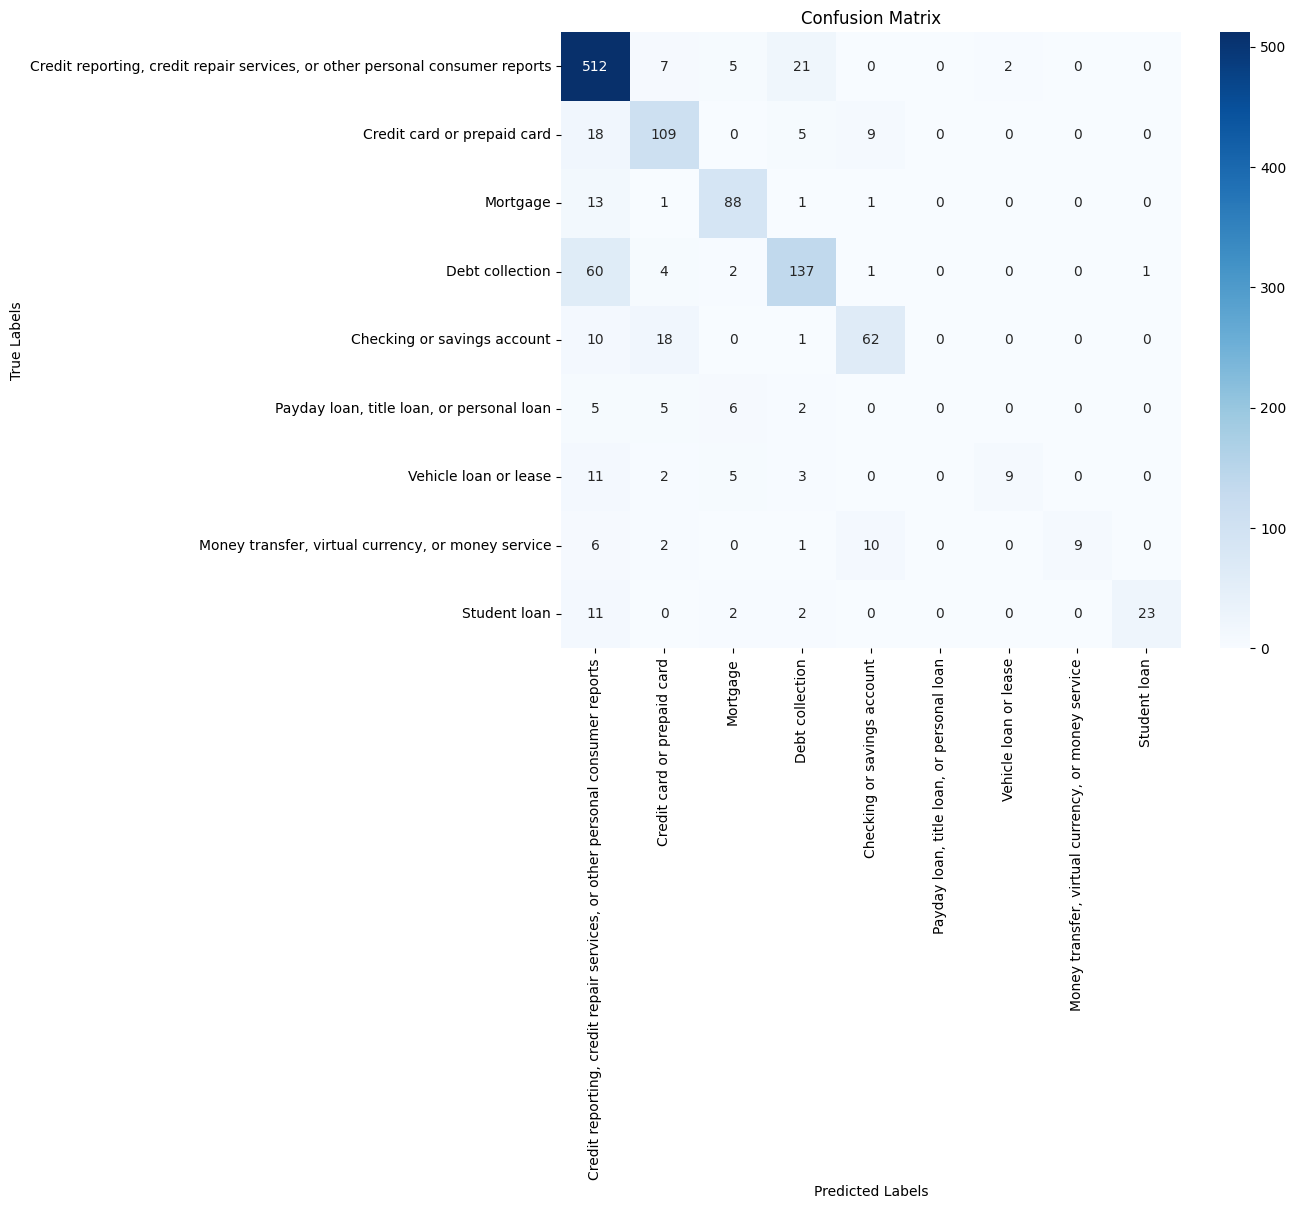

In [ ]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(valid_y, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define hyperparameters to tune
param_dist = {
    'C': uniform(loc=0.01, scale=2),  # Regularization parameter (uniform distribution between 0.01 and 2)
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithm
    'max_iter': [100, 500, 1000],  # Maximum number of iterations for convergence
}

# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Create the randomized search with cross-validation
random_search = RandomizedSearchCV(logreg_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit the randomized search to the training data
random_search.fit(xtrain_tfidf, train_y)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_logreg_model = random_search.best_estimator_

# Make predictions on the validation set using the best model
predictions = best_logreg_model.predict(xvalid_tfidf)

# Evaluate the best model's performance
accuracy = accuracy_score(valid_y, predictions)
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", accuracy)

# Generate the classification report for the best model
report = classification_report(valid_y, predictions, target_names=class_names)
print("Classification Report for Best Model:")
print(report)


Best Hyperparameters: {'C': 1.4739878836228102, 'max_iter': 100, 'solver': 'lbfgs'}
Best Model Accuracy: 0.7953410981697171
Classification Report for Best Model:
                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.80      0.94      0.86       547
                                                 Credit card or prepaid card       0.74      0.77      0.75       141
                                                                    Mortgage       0.81      0.86      0.83       104
                                                             Debt collection       0.78      0.67      0.72       205
                                                 Checking or savings account       0.78      0.70      0.74        91
                                   Payday loan, title loan, or personal loan       0.00      0.00      0.00        18
           

In [ ]:
# save the model

In [ ]:
import pickle

# Assuming 'best_logreg_model' is the trained logistic regression model
model_filename = 'best1_logreg_model.pkl'

# Save the model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(best_logreg_model, file)
